<a id="introduction"></a>
# Project: Wrangling and Analyze Data

- This project wrangles, assesses, cleans, and analyzes tweets from the WeRateDogs @dog_rates twitter account.
- Our objective is to gather (wrangle) the data from the three different sources, using three different methods.
- We will assess the data for quality and tidiness issues, then clean the issues identified.
- After the data has been cleaned, we will analyze and visualize the data.



<a id="table_of_contents"></a>

### <li><a href="#introduction">Introduction</a></li>
### <li><a href="#data_gathering">Data Gathering</a>:</li>
<li><a href="#twitter_archive">twitter_archive</a></li>
<li><a href="#image_predictions">image_predictions</a></li>
<li><a href="#json_tweets">json_tweets</a></li>

### <li><a href="#assessing_data">Assessing Data</a>:</li>
<li><a href="#assessing_twitter_archive">twitter_archive</a></li>
<li><a href="#assessing_image_predictions">image_predictions</a></li>
<li><a href="#assessing_json_tweets">json_tweets</a></li>

#### <li><a href="#quality_issues">Quality Issues</a> | <a href="#tidiness_issues">Tidiness Issues</a></li>

### <li><a href="#cleaning_data">Cleaning Data:</a></li>
    
<li><a href="#quality1">Quality Issue #1</a></li>
<li><a href="#quality2">Quality Issue #2</a></li>
<li><a href="#quality3">Quality Issue #3</a></li>
<li><a href="#quality4">Quality Issue #4</a></li>
<li><a href="#quality5">Quality Issue #5</a></li>
<li><a href="#quality6">Quality Issue #6</a></li>
<li><a href="#quality7">Quality Issue #7</a></li>
<li><a href="#quality8">Quality Issue #8</a></li>
<li><a href="#tidiness1">Tidiness Issue #1</a></li>
<li><a href="#tidiness2">Tidiness Issue #2</a></li>

### <li><a href="#storing_data">Storing Data</a></li>

### <li><a href="#analyze_and_visualize">Analyzing and Visualization:</a></li>
<li><a href="#insights">Insights</a></li>
<li><a href="#insight1">Insight #1</a></li>
<li><a href="#insight2">Insight #2</a></li>
<li><a href="#insight3">Insight #3</a></li>
<li><a href="#insight4">Insight #4</a></li>

### <li><a href="#conclusion">Conclusion</a></li>

In [370]:
#Import libraries

import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

#Setting the max rows and max column width to see entire string
#Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

<a id="data_gathering"></a>


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.



<a href="#table_of_contents"> Table of Contents </a>


<a id="twitter_archive"></a>


#### twitter_archive
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [371]:
#Create dataframe for twitter_archive by reading the csv using pandas
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

<a id="image_predictions"></a>

#### image_predictions
2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [372]:
#Request file using Requests library and the file url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [373]:
#Open and write the file
with open('image-prediction.tsv', mode='wb') as file:
    file.write(response.content)

In [374]:
#Create the dataframe for image_predictions and read in the file using pandas
image_predictions = pd.read_csv('image-prediction.tsv', sep='\t')

<a id="json_tweets"></a>

### json_tweets

3. Use the Tweepy library to query additional data via the Twitter API (tweet-json.txt)

In [375]:
#This is the provided tweepy code by UDACITY. It does not run and has been commented out so that the alternate method may be used.

'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = twitt

In [376]:
#Open and read json file line by line
#Source: https://pandas.pydata.org/docs/reference/api/pandas.read_json.html

with open('tweet-json.txt') as file:
    json_tweets = pd.read_json(file, lines=True, encoding='utf-8') 


In [377]:
#Create dataframe for json_tweets

json_tweets = pd.DataFrame(json_tweets, columns = ['id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status'])

<a id="assessing_data"></a>



## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

<a href="#table_of_contents"> Table of Contents </a>


<a id="assessing_twitter_archive"></a>


### twitter_archive

In [378]:
'''
Assess entire dataframe visually. 
Commented out to save space, see twitter_archive.head() and twitter_archive.tail() 
for samples from the first and last entires in the dataframe.
'''


#twitter_archive

'\nAssess entire dataframe visually. \nCommented out to save space, see twitter_archive.head() and twitter_archive.tail() \nfor samples from the first and last entires in the dataframe.\n'

In [379]:
#Visually assess first 5 rows of dataframe 
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [380]:
#Visually assess last 5 rows of dataframe
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


Notes: 
- 4 columns for dog stage
- source column contains HTML
- Missing data from names column as "None"
- Inaccurate dog names

In [381]:
#View value counts for each name
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [382]:
#Look at inaccurate dog names
inaccurate_names_mask = twitter_archive['name'].str.contains('^[a-z]', regex = True)
twitter_archive[inaccurate_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [383]:
#View all data correlating to inaccurate names
twitter_archive[inaccurate_names_mask]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None


Note:
- There are no names available to replace inaccurate names with.

In [384]:
#Look at datatypes and non-null value counts for columns in dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Notes: 
- timestamp should be datetime
- 78 reply tweets, we only want original tweets.
- 181 retweets, we only want original tweets.

In [385]:
#Display number of rows and number of columns in the dataframe
twitter_archive.shape

(2356, 17)

There are 2356 total tweets in twitter_archive.

In [386]:
replies = 78
retweets = 181
total_original_tweets = 2356 - (replies + retweets)

total_original_tweets

2097

There are 2097 total original tweets in the twitter_archive dataframe.

In [387]:
#Null values or missing data
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

Notes:
- 59 null values in expanded_urls.

In [388]:
#Check for duplicated tweets
twitter_archive.duplicated().sum()

0

In [389]:
#Descriptive information about numerative values
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Notes:
- The minimum rating_numerator and rating_denominator is 0.
- The maximum rating_numerator is 1776 and rating_denominator is 170.

In [390]:
#View all data for tweet containing rating_numerator == 1776
twitter_archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


Notes:
- The maximum numerator of 1776 is valid.

In [391]:
#View all data for tweets containing rating_numerator == 0
twitter_archive.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


Notes:
- Neither tweet with rating_numerator 0 are about dogs.

In [392]:
#View all data for tweet containing rating_denominator == 170
twitter_archive.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None


Notes:
- The tweet containing rating_denominator 170 is valid.

In [393]:
#View all data for tweet containing rating_denominator == 0
twitter_archive.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


Notes:
- The tweet containing denominator 0 is valid, but the denominator is not from the actual rating. The actual rating is 13/10. However, this tweet is a reply and we're only interested in original tweets.

In [394]:
#Check for other tweets with more than one rating
#I had a warning pop up when I first ran this code and fixed it with this source: 
# https://stackoverflow.com/questions/39901550/python-userwarning-this-pattern-has-match-groups-to-actually-get-the-groups

multiple_ratings = twitter_archive[twitter_archive.text.str.contains("(?:\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

multiple_ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
561,802624713319034886,NaN,NaN,2016-11-26 21:26:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",7.776842e+17,4.196984e+09,2016-09-19 01:42:24 +0000,"https://twitter.com/dog_rates/status/777684233540206592/photo/1,https://twitter.com/dog_rates/status/777684233540206592/photo/1",12,10,None,None,None,None,None
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
860,763167063695355904,NaN,NaN,2016-08-10 00:16:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,6.732953e+17,4.196984e+09,2015-12-06 00:17:55 +0000,https://twitter.com/dog_rates/status/673295268553605120/photo/1,8,10,Eve,None,None,pupper,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for 

Note: 
- There are tweets with multiple/inaccurate ratings.

<a id="assessing_image_predictions"></a>


### image_predictions

In [395]:
'''
Assess entire dataframe visually. 
Commented out to save space, see image_predictions.head() and image_predictions.tail() 
for samples from the first and last entires in the dataframe.
'''


#image_predictions

'\nAssess entire dataframe visually. \nCommented out to save space, see image_predictions.head() and image_predictions.tail() \nfor samples from the first and last entires in the dataframe.\n'

In [396]:
#Visually assess first 5 rows of dataframe
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [397]:
#Visually assess last 5 rows of dataframe
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


Notes:
- Non-descriptive column names
- Underscores in prediction breeds, eg: labrador_retriever, english_springer


In [398]:
#Display number of rows and number of columns in the dataframe

image_predictions.shape

(2075, 12)

There are 2075 tweets. This is less than the total number of original tweets in twitter_archive.

In [399]:
#Null values or missing data

image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [400]:
#Check for duplicated tweets

image_predictions.duplicated().sum()

0

<a id="assessing_json_tweets"></a>


### json_tweets

In [401]:
'''
Assess entire dataframe visually. 
Commented out to save space, see json_tweets.head() and json_tweets.tail() 
for samples from the first and last entires in the dataframe.
'''

#json_tweets

'\nAssess entire dataframe visually. \nCommented out to save space, see json_tweets.head() and json_tweets.tail() \nfor samples from the first and last entires in the dataframe.\n'

In [402]:
#Visually assess first 5 rows of dataframe
json_tweets.head()

,id,favorite_count,retweet_count,created_at,source,retweeted_status
0,892420643555336193,39467,8853,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN
1,892177421306343426,33819,6514,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN
2,891815181378084864,25461,4328,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN
3,891689557279858688,42908,8964,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN
4,891327558926688256,41048,9774,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN


In [403]:
#Visually assess last 5 rows of dataframe
json_tweets.tail()

,id,favorite_count,retweet_count,created_at,source,retweeted_status
2349,666049248165822465,111,41,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN
2350,666044226329800704,311,147,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN
2351,666033412701032449,128,47,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN
2352,666029285002620928,132,48,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN
2353,666020888022790149,2535,532,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN


Notes:
This contains duplicate and additional data to twitter_archive table.

In [404]:
#Display number of rows and columns in dataframe
json_tweets.shape

(2354, 6)

There are 2354 total tweets in this table.

In [405]:
#View non-null value counts for every column in json_tweets dataframe
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                2354 non-null   int64              
 1   favorite_count    2354 non-null   int64              
 2   retweet_count     2354 non-null   int64              
 3   created_at        2354 non-null   datetime64[ns, UTC]
 4   source            2354 non-null   object             
 5   retweeted_status  179 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 110.5+ KB


There are 179 retweets in this dataframe.

In [406]:
#Calculate the total number of original tweets.
retweets = 179
total_original_tweets = 2354 - retweets

total_original_tweets

2175

There are 2175 total original tweets in this dataframe. This is more than the total original tweets in twitter_archive.

<a id="quality_issues"></a>


### Quality issues
1. Retweets and replies are present. We are only concerned with original tweets. 
- <a href="#quality1">Quality Issue #1</a>

2. Incorrect dog names: a, an, the, etc.
- <a href="#quality2">Quality Issue #2</a>

3. Incorrect datatype for timestamp in the twitter_archive dataframe.
- <a href="#quality3">Quality Issue #3</a>

4. Incorrect rating for tweets with multiple ratings or strings that appear like ratings.
- <a href="#quality4">Quality Issue #4</a>
5. Tweets with rating_numerator == 0 in twitter_archive are not about dogs.
- <a href="#quality5">Quality Issue #5</a>

6. Non-descriptive column names in image_predictions
- <a href="#quality6">Quality Issue #6</a>

7. HTML in source columns of twitter_archive and json_tweets.
- <a href="#quality7">Quality Issue #7</a>

8. Underscores in p1, p2, p3 columns in image_predictions dataframe.
- <a href="#quality8">Quality Issue #8</a>

<a id="tidiness_issues"></a>


### Tidiness issues
1. There are four columns for the "stage" of dog in the twitter_archive dataframe.
- <a href="#tidiness1">Tidiness Issue #1</a>

2. Dataframes contain data about the same tweets. Only one dataframe is necessary.
- <a href="#tidiness2">Tidiness Issue #2</a>

<a id="cleaning_data"></a>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

<a href="#table_of_contents"> Table of Contents </a>


In [407]:
# Make copies of original pieces of data

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
json_tweets_clean = json_tweets.copy()

<a id="quality1"></a>

### Quality Issue #1:

#### Define: Retweets and replies are presents but we are only concerned with original tweets. We will drop retweets and replies from our dataframes.

#### Code

In [408]:
#Remove retweets from twitter_archive
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

In [409]:
#Remove replies from twitter_archive
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isna()]

In [410]:
#Remove retweets from json_tweets
json_tweets_clean = json_tweets_clean[json_tweets_clean.retweeted_status.isna()]

#### Test

In [411]:
#View column names and non-null values to confirm drops. Specified columns should have 0 non-null values.
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [412]:
json_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                2175 non-null   int64              
 1   favorite_count    2175 non-null   int64              
 2   retweet_count     2175 non-null   int64              
 3   created_at        2175 non-null   datetime64[ns, UTC]
 4   source            2175 non-null   object             
 5   retweeted_status  0 non-null      object             
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 118.9+ KB


We have successfully dropped the retweets and replies from both dataframes!

<a id="quality2"></a>

### Quality Issue #2:

#### Define: Incorrect dog names: a, an, the, etc. We will set these names to 'None', because there are no actual names available in the tweet. Then, we will take all 'None' name values and convert them to NaN for missing values.


#### Code

In [413]:
#View all incorrect dog names
incorrect_names_mask = twitter_archive_clean['name'].str.contains('^[a-z]', regex = True)
twitter_archive_clean[incorrect_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [414]:
#Set incorrect names to 'None'
twitter_archive_clean.loc[incorrect_names_mask, 'name'] = "None"

In [415]:
#Test to make sure incorrect names have been set to 'None'
twitter_archive_clean[incorrect_names_mask].name.value_counts().sort_index()

None    104
Name: name, dtype: int64

In [416]:
#Set 'None' names to NaN
twitter_archive_clean.name = twitter_archive_clean['name'].replace('None', np.nan)

#### Test

In [417]:
#Test to make sure all 'None' name values have been set to NaN
twitter_archive_clean[incorrect_names_mask].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

In [418]:
#View all name non-null name values
twitter_archive_clean['name'].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: name, Length: 929, dtype: int64

We have successfully turned all incorrect names into NaN values. This will help us during the visualization process, so that we aren't seeing a large portion of the name 'None' in our charts.

<a id="quality3"></a>

### Quality Issue #3:

#### Define: 3. Incorrect datatype for timestamp in the twitter_archive dataframe. We will convert timestamp to datetime datatype.

#### Code

In [419]:
#Convert 'timestamp' from string to datetime datatype using to_datetime in pandas.
#Source: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [420]:
#View columns and datatypes to confirm timestamp has been converted to datetime
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

Success! 'timestamp' has been converted to a datetime datatype.

<a id="quality4"></a>

### Quality Issue #4:

#### Define: Incorrect rating for tweets with multiple ratings or strings that appear like ratings. We will manually correct this.

#### Code

In [421]:
#View tweets with multiple ratings present
multiple_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains("(?:\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")]

multiple_ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233540206592/photo/1,12,10,NaN,None,None,None,None
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",10,10,Bookstore,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1222,714258258790387713,NaN,NaN,2016-03-28 01:10:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714258258790387713/photo/1,10,10,Travis,None,None,None,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393781329922/photo/1,9,10,Socks,None,None,None,None
1459,695064344191721472,NaN,NaN,2016-02-04 02:00:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695064344191721472/video/1,4,10,NaN,None,None,None,None
1465,694352839993344000,NaN,NaN,2016-02-02 02:53:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/69435283

In [422]:
#Query tweet_ids for inaccurate ratings, ignoring tweets with multiple ratings for multiple dogs

incorrect_ratings = twitter_archive_clean.query('(tweet_id == 740373189193256964) or (tweet_id == 722974582966214656) or (tweet_id == 716439118184652801) or (tweet_id == 682962037429899265) or (tweet_id == 666287406224695296)')

incorrect_ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,NaN,None,None,None,None


In [423]:
#Manually update each tweet at their rating_numerator cell and rating_denominator cell
#Source: https://re-thought.com/how-to-change-or-update-a-cell-value-in-python-pandas-dataframe/


twitter_archive_clean.at[1068, 'rating_numerator'] = 14
twitter_archive_clean.at[1068, 'rating_denominator'] = 10

twitter_archive_clean.at[1165, 'rating_numerator'] = 13
twitter_archive_clean.at[1165, 'rating_denominator'] = 10

twitter_archive_clean.at[1202, 'rating_numerator'] = 11
twitter_archive_clean.at[1202, 'rating_denominator'] = 10

twitter_archive_clean.at[1662, 'rating_numerator'] = 10
twitter_archive_clean.at[1662, 'rating_denominator'] = 10

twitter_archive_clean.at[2335, 'rating_numerator'] = 9
twitter_archive_clean.at[2335, 'rating_denominator'] = 10


#### Test

In [424]:
#Confirm with query that specified tweets have had their rating_numerator and rating_denominator values updated
updated_ratings = twitter_archive_clean.query('(tweet_id == 740373189193256964) or (tweet_id == 722974582966214656) or (tweet_id == 716439118184652801) or (tweet_id == 682962037429899265) or (tweet_id == 666287406224695296)')

updated_ratings

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,NaN,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13,10,NaN,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11,10,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037429899265/photo/1,10,10,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9,10,NaN,None,None,None,None


Success! We've manually updated the inaccurate ratings!

<a id="quality5"></a>

### Quality Issue #5:

#### Define: 5. Tweets with rating_numerator == 0 in twitter_archive are not about dogs. We will drop these tweets.

#### Code

In [425]:
#Query to see tweets where rating_numerator is equal to 0
twitter_archive_clean.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,NaN,None,None,None,None


Note: One of these tweets was dropped when we dropped retweets and replies.

In [426]:
#Using drop to remove the row at index 315
twitter_archive_clean.drop(index=315, inplace=True)

#### Test

In [427]:
#Running the query to see tweets where rating_numerator is equal to 0 again
#It shouldn't return any rows now

twitter_archive_clean.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [428]:
#Running a query to confirm that the tweet with tweet_id 835152434251116546 has been dropped
twitter_archive_clean.query('tweet_id == 835152434251116546')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Success! We've dropped the tweet with rating_numeral == 0. 

<a id="quality6"></a>

### Quality Issue #6:

#### Define: 6. Non-descriptive column names in image_predictions. We will change these column names.

#### Code

In [429]:
#Get a list of column names for the image_predictions_clean dataframe.
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [430]:
#Renaming columns using df.rename, example:
#df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)
#Source: https://www.statology.org/pandas-rename-columns/

image_predictions_clean.rename(columns = {'p1':'prediction1','p1_conf':'prediction1_confidence','p1_dog':'prediction1_dog', 
                                    'p2':'prediction2','p2_conf':'prediction2_confidence','p2_dog':'prediction2_dog', 
                                    'p3':'prediction3','p3_conf':'prediction3_confidence','p3_dog':'prediction3_dog'}, inplace=True)



#### Test

In [431]:
#View column names to confirm they have been changed
list(image_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction1',
 'prediction1_confidence',
 'prediction1_dog',
 'prediction2',
 'prediction2_confidence',
 'prediction2_dog',
 'prediction3',
 'prediction3_confidence',
 'prediction3_dog']

<a id="quality7"></a>

### Quality Issue #7:

#### Define: HTML in source columns of twitter_archive and json_tweets. We will isolate the source by removing the HTML.

#### Code

In [432]:
#Extract source information from html string using str.extract() method
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

In [433]:
json_tweets_clean['source'] = json_tweets_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [434]:
#Use value_counts() to view the source values, there should only be text now
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1963
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [435]:
json_tweets_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

Success! We've extracted the text from the source string.

<a id="quality8"></a>

### Quality Issue #8:

#### Define: Underscores in prediction1, prediction2, prediction3 columns in image_predictions dataframe. We will remove underscores and set everything to lowercase for consistency.

#### Code

In [436]:
#First, set all prediction columns to lowercase using str.lower()

image_predictions_clean['prediction1'] = image_predictions_clean['prediction1'].str.lower()
image_predictions_clean['prediction2'] = image_predictions_clean['prediction2'].str.lower()
image_predictions_clean['prediction3'] = image_predictions_clean['prediction3'].str.lower()

In [437]:
#Second, replace all underscores in prediction columns with spaces using str.replace()

image_predictions_clean['prediction1'] = image_predictions_clean['prediction1'].str.replace('_', ' ')
image_predictions_clean['prediction2'] = image_predictions_clean['prediction2'].str.replace('_', ' ')
image_predictions_clean['prediction3'] = image_predictions_clean['prediction3'].str.replace('_', ' ')

#### Test

In [438]:
#View data to confirm the underscores have been removed from specified column values.
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


Success! We have set the predictions to lowercase and replaced the underscores with spaces!

<a id="tidiness1"></a>


### Tidiness Issue #1:

#### Define: There are four columns for the "stage" of dog in the twitter_archive dataframe. We will combine these into 1 column named "dog_stage"

#### Code

In [439]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2096 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2096 non-null   datetime64[ns, UTC]
 4   source                      2096 non-null   object             
 5   text                        2096 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2093 non-null   object             
 10  rating_numerator            2096 non-null   int64           

In [440]:
# First replace None in stage columns with an empty string as follows.
twitter_archive_clean['doggo'].replace('None', '', inplace=True)  
twitter_archive_clean['floofer'].replace('None', '', inplace=True) 
twitter_archive_clean['pupper'].replace('None', '', inplace=True)  
twitter_archive_clean['puppo'].replace('None', '', inplace=True)  


In [441]:
# Then combine stage columns.
twitter_archive_clean['dog_stage'] = (twitter_archive_clean.doggo + twitter_archive_clean.floofer 
                                  + twitter_archive_clean.pupper + twitter_archive_clean.puppo)

In [442]:
# Then format entries with multiple dog stages which appeared like doggopupper.
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper' 
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo' 
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

#### Test

In [443]:
#View value_counts of 'dog_stage'
twitter_archive_clean['dog_stage'].value_counts()

                 1760
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [444]:
#View column names and non-null values to confirm specified columns have been added or dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2096 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2096 non-null   datetime64[ns, UTC]
 4   source                      2096 non-null   object             
 5   text                        2096 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2093 non-null   object             
 10  rating_numerator            2096 non-null   int64           

We have successfully merged the four types of dog stages into one column called "dog_stage" and converted the 'None' values to NaN.

<a id="tidiness2"></a>

### Tidiness Issue #2:

#### Define: Dataframes contain data about the same tweets. Only one dataframe is necessary. We will merge our dataframes into one dataframe and drop any unecessary columns.

#### Code

In [445]:
#Merge twitter_archive_clean with image_predictions_clean

twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='left')

In [446]:
#Rename 'id' column in json_tweets_clean to 'tweet_id'
#df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)

json_tweets_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [447]:
#Merge the new twitter_archive_clean with json_tweets

twitter_archive_clean = twitter_archive_clean.merge(json_tweets_clean, on='tweet_id', how='left')

In [448]:
#View a list of new columns in merged dataframe
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source_x',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'dog_stage',
 'jpg_url',
 'img_num',
 'prediction1',
 'prediction1_confidence',
 'prediction1_dog',
 'prediction2',
 'prediction2_confidence',
 'prediction2_dog',
 'prediction3',
 'prediction3_confidence',
 'prediction3_dog',
 'favorite_count',
 'retweet_count',
 'created_at',
 'source_y',
 'retweeted_status']

In [449]:
#Combine rating_numerator and rating_denomintator into one column called 'rating'
twitter_archive_clean['rating'] = (twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'])


In [450]:
#Compare 'source_x' to 'source_y'
#df['Column4'].equals(df['Column2'])
#Source: https://www.geeksforgeeks.org/how-to-compare-two-columns-in-pandas/

twitter_archive_clean['source_x'].equals(twitter_archive_clean['source_y'])

True

In [451]:
#Rename 'source_y' to 'source'

twitter_archive_clean.rename(columns = {'source_y':'source'}, inplace=True)

In [452]:
#Repeat comparison for 'timestamp' and 'created_at'
twitter_archive_clean['timestamp'].equals(twitter_archive_clean['created_at'])

True

In [453]:
#Drop unnecessary columns
# df.drop(columns =['C', 'D'])

twitter_archive_clean.drop(columns= ['in_reply_to_status_id', 'in_reply_to_user_id', 'source_x',  'retweeted_status_id',
                                     'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_numerator',
                                     'rating_denominator', 'created_at', 'retweeted_status'], inplace=True)

#### Test

In [454]:
#View data to confirm successful merge
twitter_archive_clean.head()

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,dog_stage,...,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favorite_count,retweet_count,source,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,,,,,,...,bagel,0.085851,False,banana,0.076110,False,39467,8853,Twitter for iPhone,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,,,,,,...,pekinese,0.090647,True,papillon,0.068957,True,33819,6514,Twitter for iPhone,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,,,,,,...,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,Twitter for iPhone,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,,,,,,...,labrador retriever,0.168086,True,spatula,0.040836,False,42908,8964,Twitter for iPhone,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,,,,,,...,english springer,0.225770,True,german short-haired pointer,0.175219,True,41048,9774,Twitter for iPhone,1.2


In [455]:
#View dataframe info to confirm columns have been dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                2096 non-null   int64              
 1   timestamp               2096 non-null   datetime64[ns, UTC]
 2   text                    2096 non-null   object             
 3   expanded_urls           2093 non-null   object             
 4   name                    1390 non-null   object             
 5   doggo                   2096 non-null   object             
 6   floofer                 2096 non-null   object             
 7   pupper                  2096 non-null   object             
 8   puppo                   2096 non-null   object             
 9   dog_stage               2096 non-null   object             
 10  jpg_url                 1970 non-null   object             
 11  img_num                 1970 non-null   flo

<a id="storing_data"></a>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

<a href="#table_of_contents"> Table of Contents </a>


In [456]:
#Saving final dataframe to 'twitter_archive_master.csv'
twitter_archive_master = twitter_archive_clean

twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

<a id="analyze_and_visualize"></a>

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

<a href="#table_of_contents"> Table of Contents </a>


<a id="insights"></a>

### Insights: 

1. The dog name with the most favorites and retweets is "Bo". <a href="#insight1">Insight #1</a>
    - The tweet with the most favorites has a NaN value for 'name'. The tweet_id is '822872901745569793'
    - The tweet with the most retweets also has a NaN value for 'name'. The tweet_id is '744234799360020481'
2. The most common dog_stage is "pupper" <a href="#insight2">Insight #2</a>
3. There isn't much correlation between favorite_count or retweet_count with rating. However, this is a strong correlation between favorite_count and retweet_count. <a href="#insight3">Insight #3</a>
4. The most common dog types are golden retrievers and labrador retrievers. <a href="#insight4">Insight #4</a>

### Analyze and Visualization

In [457]:
#Create final dataframe from csv, 'twitter_archive_master.csv' using pandas
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

twitter_archive_master.head()

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,dog_stage,...,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favorite_count,retweet_count,source,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,NaN,NaN,NaN,NaN,NaN,...,bagel,0.085851,False,banana,0.076110,False,39467,8853,Twitter for iPhone,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,NaN,NaN,NaN,NaN,...,pekinese,0.090647,True,papillon,0.068957,True,33819,6514,Twitter for iPhone,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,NaN,NaN,NaN,NaN,...,malamute,0.078253,True,kelpie,0.031379,True,25461,4328,Twitter for iPhone,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,NaN,NaN,NaN,NaN,...,labrador retriever,0.168086,True,spatula,0.040836,False,42908,8964,Twitter for iPhone,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,NaN,NaN,NaN,NaN,...,english springer,0.225770,True,german short-haired pointer,0.175219,True,41048,9774,Twitter for iPhone,1.2


In [458]:
#View columns, datatypes, and non-null values of dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet_id                2096 non-null   int64  
 1   timestamp               2096 non-null   object 
 2   text                    2096 non-null   object 
 3   expanded_urls           2093 non-null   object 
 4   name                    1390 non-null   object 
 5   doggo                   83 non-null     object 
 6   floofer                 10 non-null     object 
 7   pupper                  230 non-null    object 
 8   puppo                   24 non-null     object 
 9   dog_stage               336 non-null    object 
 10  jpg_url                 1970 non-null   object 
 11  img_num                 1970 non-null   float64
 12  prediction1             1970 non-null   object 
 13  prediction1_confidence  1970 non-null   float64
 14  prediction1_dog         1970 non-null   

In [459]:
#View stats about numerical data

twitter_archive_master.describe()

,tweet_id,img_num,prediction1_confidence,prediction2_confidence,prediction3_confidence,favorite_count,retweet_count,rating
count,2.096000e+03,1970.000000,1970.000000,1.970000e+03,1.970000e+03,2096.000000,2096.000000,2096.000000
mean,7.365123e+17,1.201015,0.594368,1.346469e-01,6.019253e-02,8973.462786,2841.380725,1.171054
std,6.708321e+16,0.557691,0.272066,1.010411e-01,5.094042e-02,12197.789203,4710.343662,3.966697
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,81.000000,16.000000,0.100000
25%,6.768177e+17,1.000000,0.363008,5.351907e-02,1.612658e-02,2045.750000,643.750000,1.000000
50%,7.097095e+17,1.000000,0.587635,1.173995e-01,4.945765e-02,4195.500000,1404.000000,1.100000
75%,7.874779e+17,1.000000,0.847216,1.955692e-01,9.155483e-02,11412.250000,3285.000000,1.200000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000,177.600000


<a id="insight1"></a>


### Insight 1: Most Favorited and Retweeted Dog Names

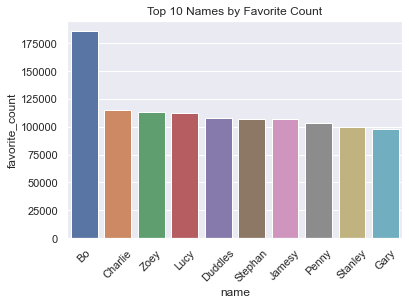

In [460]:
#Create barplot to view the Top 10 names by Favorite Count using seaborn

temp_df = pd.DataFrame(twitter_archive_master.groupby('name').sum()['favorite_count'].nlargest(10))
temp_df = temp_df.reset_index()
sns.barplot(x='name', y='favorite_count', data=temp_df)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title('Top 10 Names by Favorite Count');

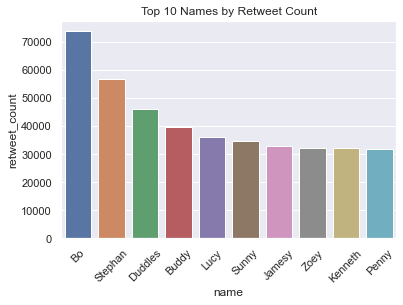

In [461]:
#Create barplot to view Top 10 Names by Retweet Count using seaborn

temp_df = pd.DataFrame(twitter_archive_master.groupby('name').sum()['retweet_count'].nlargest(10))
temp_df = temp_df.reset_index()
sns.barplot(x='name', y='retweet_count', data=temp_df)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.title('Top 10 Names by Retweet Count');

**Note: Bo has the highest number of favorites and retweets.**

In [462]:
#Query for tweets where dogs are named "Bo"
dogs_named_bo = twitter_archive_master.query('name == "Bo"')

dogs_named_bo

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,dog_stage,...,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favorite_count,retweet_count,source,rating
349,819004803107983360,2017-01-11 02:15:36+00:00,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",Bo,doggo,NaN,NaN,NaN,doggo,...,toy poodle,0.271929,True,tibetan terrier,0.094759,True,95450,42228,Twitter for iPhone,1.4
431,804026241225523202,2016-11-30 18:16:08+00:00,This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq,"https://twitter.com/dog_rates/status/804026241225523202/photo/1,https://twitter.com/dog_rates/status/804026241225523202/photo/1,https://twitter.com/dog_rates/status/804026241225523202/photo/1",Bo,NaN,NaN,NaN,NaN,NaN,...,envelope,0.050566,False,guillotine,0.015297,False,49774,18876,Twitter for iPhone,1.3
515,789137962068021249,2016-10-20 16:15:26+00:00,This is Bo. He's a West Congolese Bugaboop Snuggle. Rather exotic. Master of the head tilt. 12/10 would pay to pet https://t.co/2jwxxtNzoN,"https://twitter.com/dog_rates/status/789137962068021249/photo/1,https://twitter.com/dog_rates/status/789137962068021249/photo/1,https://twitter.com/dog_rates/status/789137962068021249/photo/1",Bo,NaN,NaN,NaN,NaN,NaN,...,pekinese,0.070383,True,pembroke,0.049237,True,10875,3244,Twitter for iPhone,1.2
676,761004547850530816,2016-08-04 01:03:17+00:00,This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,https://twitter.com/dog_rates/status/761004547850530816/photo/1,Bo,NaN,NaN,NaN,NaN,NaN,...,sussex spaniel,0.064897,True,labrador retriever,0.047704,True,12482,3952,Twitter for iPhone,1.1
768,749996283729883136,2016-07-04 16:00:22+00:00,This is Bo. He emanates happiness. 12/10 I could cut the freedom with a knife https://t.co/c7LNFt39eR,https://twitter.com/dog_rates/status/749996283729883136/photo/1,Bo,NaN,NaN,NaN,NaN,NaN,...,west highland white terrier,0.151040,True,soft-coated wheaten terrier,0.056420,True,3331,919,TweetDeck,1.2
1445,681694085539872773,2015-12-29 04:31:49+00:00,This is Bo. He's a Benedoop Cumbersnatch. Seems frustrated with own feet. Portable as hell. 11/10 very solid pupper https://t.co/TONMhRoQh7,https://twitter.com/dog_rates/status/681694085539872773/photo/1,Bo,NaN,NaN,pupper,NaN,pupper,...,miniature poodle,0.060857,True,maltese dog,0.006064,True,14010,4581,Twitter for iPhone,1.1


In [463]:
#Query to find tweet data for the tweet with the most favorites
most_favorites = twitter_archive_master.query('favorite_count == 132810')

most_favorites

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,dog_stage,...,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favorite_count,retweet_count,source,rating
324,822872901745569793,2017-01-21 18:26:02+00:00,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,NaN,NaN,NaN,NaN,puppo,puppo,...,labrador retriever,0.160329,True,irish terrier,0.069126,True,132810,48265,Twitter for iPhone,1.3


In [464]:
#Query to find tweet data for the tweet with the most retweets
most_retweets = twitter_archive_master.query('retweet_count == 79515')

most_retweets

,tweet_id,timestamp,text,expanded_urls,name,doggo,floofer,pupper,puppo,dog_stage,...,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favorite_count,retweet_count,source,rating
824,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,NaN,doggo,NaN,NaN,NaN,doggo,...,ice bear,0.044681,False,whippet,0.018442,True,131075,79515,Twitter for iPhone,1.3


<a id="insight2"></a>


### Insight 2: Most Common Dog Stage

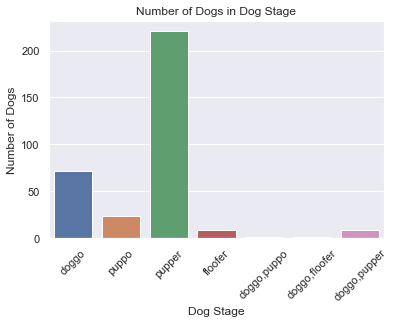

In [465]:
#Create a barplot/countplot to view most common dog stage

sns.countplot(data=twitter_archive_master, x='dog_stage')
plt.title('Number of Dogs in Dog Stage')
plt.xlabel('Dog Stage')
plt.xticks(rotation=45)
plt.ylabel('Number of Dogs');

<a id="insight3"></a>

### Insight 3: Correlation between favorite_count, retweet_count, and rating

In [466]:
#Create correlation matrix to analyze the correlation between favorite_count, retweet_count, and rating
correlation_matrix = twitter_archive_clean[['favorite_count', 'retweet_count', 'rating']].corr(method='pearson')

correlation_matrix

,favorite_count,retweet_count,rating
favorite_count,1.000000,0.911482,0.016371
retweet_count,0.911482,1.000000,0.018523
rating,0.016371,0.018523,1.000000


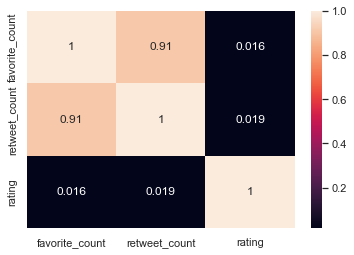

In [467]:
#Create a visualization of the above correlation matrix with a correlation heatmap using seaborn

sns.heatmap(correlation_matrix, annot=True)

plt.show();

There isn't much correlation at all between the number of favorites or retweets with rating. However, there is a high correlation between the number of favorites and the number of retweets.

<a id="insight4"></a>

### Insight 4: Most Common Dog Breeds

In [468]:
#Create temporary dataframe for prediction columns
temp_df = twitter_archive_master[['prediction1', 'prediction2', 'prediction3']]

#Find the mode or most common value in each column
temp_df.mode()

,prediction1,prediction2,prediction3
0,golden retriever,labrador retriever,labrador retriever


In [469]:
#Analyze the most common dog breeds in prediction1
most_common_breeds1 = temp_df.prediction1.value_counts().nlargest(5)
most_common_breeds1

golden retriever      137
labrador retriever     94
pembroke               88
chihuahua              78
pug                    54
Name: prediction1, dtype: int64

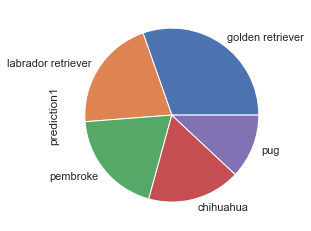

In [470]:
#Visualize most common dog breeds in prediction1 with pie chat

most_common_breeds1.plot.pie(subplots=True);

In [471]:
#Analyze most common breeds in prediction2
most_common_breeds2 = temp_df.prediction2.value_counts().nlargest(5)
most_common_breeds2

labrador retriever          95
golden retriever            82
cardigan                    73
chihuahua                   43
chesapeake bay retriever    40
Name: prediction2, dtype: int64

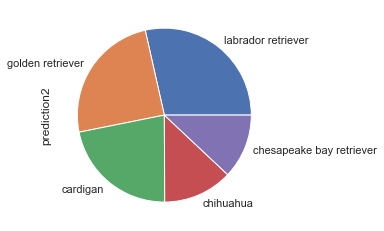

In [472]:
#Visualize most common breeds in prediction2 with pie chart
most_common_breeds2.plot.pie(subplots=True);

In [473]:
#Analyze most common breeds in prediction3

most_common_breeds3 = temp_df.prediction3.value_counts().nlargest(5)

most_common_breeds3

labrador retriever    76
chihuahua             57
golden retriever      45
eskimo dog            36
kelpie                33
Name: prediction3, dtype: int64

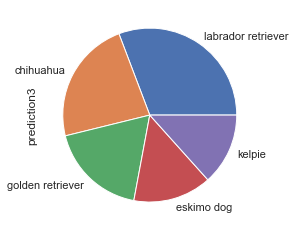

In [474]:
#Visualize most common breeds in prediction3 with pie chart
most_common_breeds3.plot.pie(subplots=True);

<a id="conclusion"></a>
### Conclusion

1. The name with the most favorites and retweets is the name "Bo."
2. The most common dog stage is "pupper."
3. There isn't very much correlation between 'favorite_count' or 'retweet_count' with 'rating', however there is a strong correlation between 'favorite_count' and 'retweet_count'.
4. The most common dog breeds are golden retrievers and labrador retrievers.

<a href="#table_of_contents"> Table of Contents </a>
